In [40]:
import cv2
import numpy as np
import imutils
import pytesseract
from matplotlib import pyplot as plt
should_save = True
def show_img(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 8)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

4000 3000


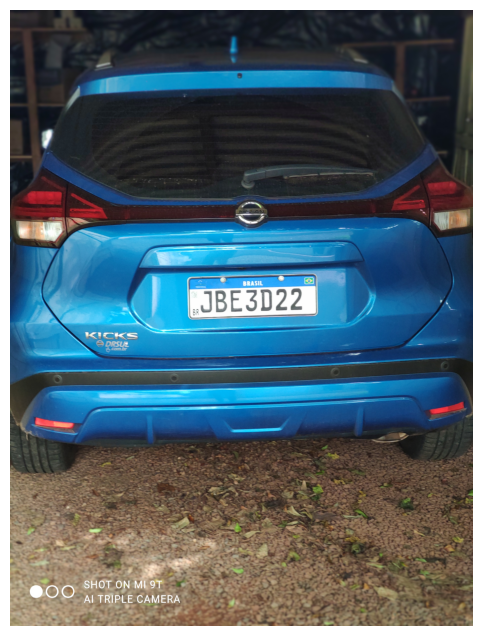

In [41]:
img = cv2.imread('fotos/1.jpg')
(H, W) = img.shape[:2]
print(H, W)
show_img(img)

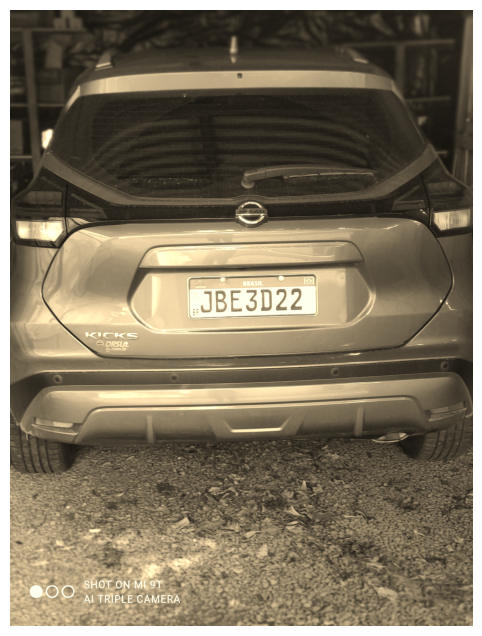

True

In [42]:
sepia = cv2.transform(img, np.matrix([[0.272, 0.534, 0.131],
                                    [0.349, 0.686, 0.168],
                                    [0.393, 0.769, 0.189]]))
sepia[np.where(img > 255)] = 255 
sepia = np.array(sepia, dtype=np.uint8)
show_img(sepia)

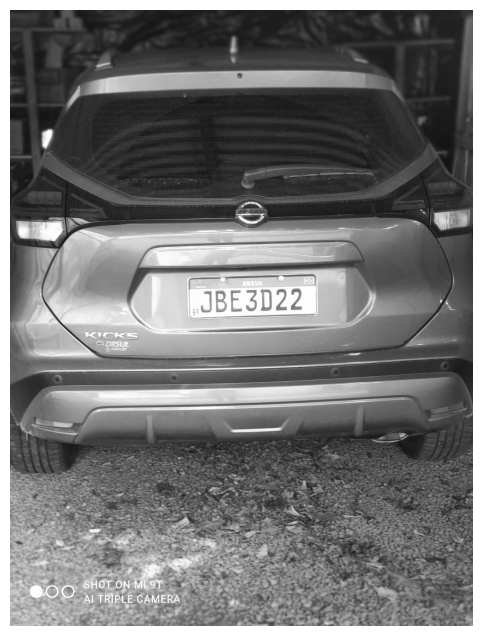

True

In [44]:
gray = cv2.cvtColor(sepia, cv2.COLOR_BGR2GRAY)
show_img(gray)

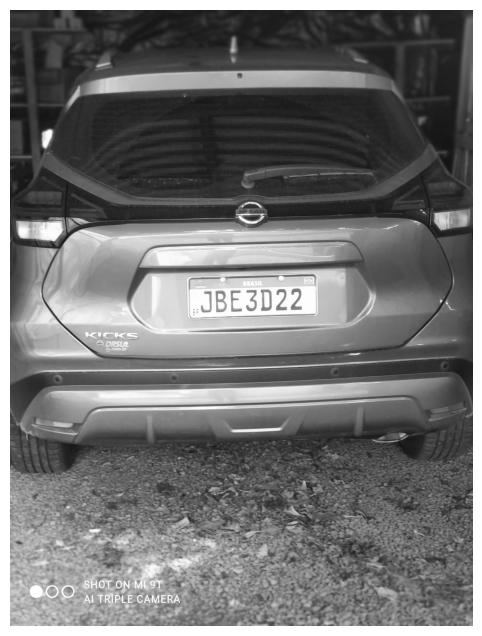

True

In [45]:
blur = cv2.bilateralFilter(gray, 11, 17, 17)
show_img(blur)

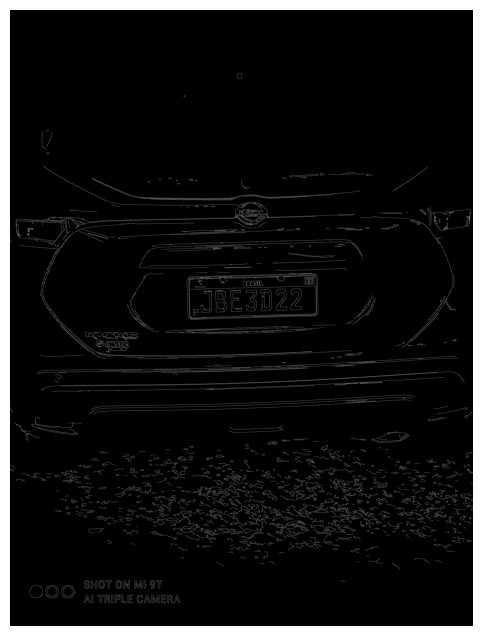

True

In [46]:
edged = cv2.Canny(blur, 50, 200, apertureSize=3)
show_img(edged)

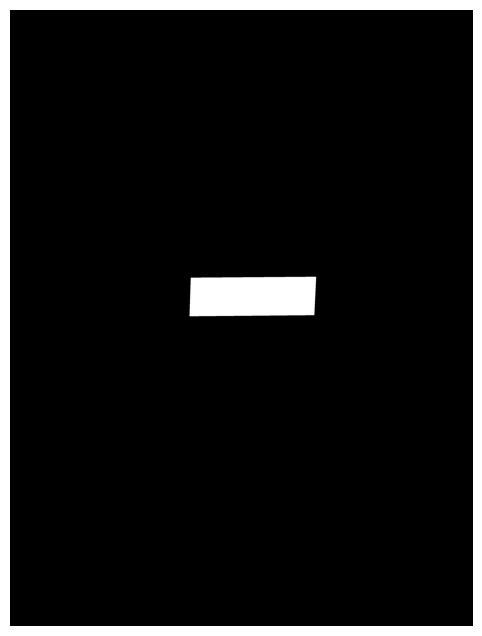

True

In [47]:
conts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
conts = imutils.grab_contours(conts)
conts = sorted(conts, key=cv2.contourArea, reverse=True)[:8]

location = None
for c in conts:
    peri = cv2.arcLength(c, True)
    aprox = cv2.approxPolyDP(c, 0.02 * peri, True)
    if cv2.isContourConvex(aprox):
      if len(aprox) == 4:
          location = aprox
          break

mask = np.zeros(gray.shape, np.uint8)
img_plate = cv2.drawContours(mask, [location], 0, 255, -1)
show_img(mask)

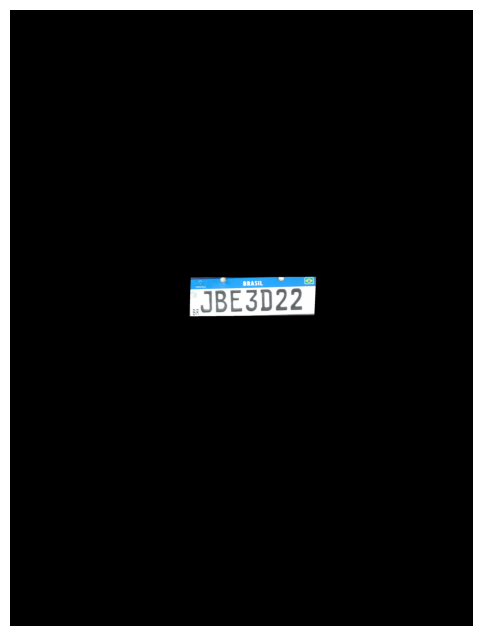

True

In [48]:
img_plate = cv2.bitwise_and(img, img, mask=mask)
show_img(img_plate)

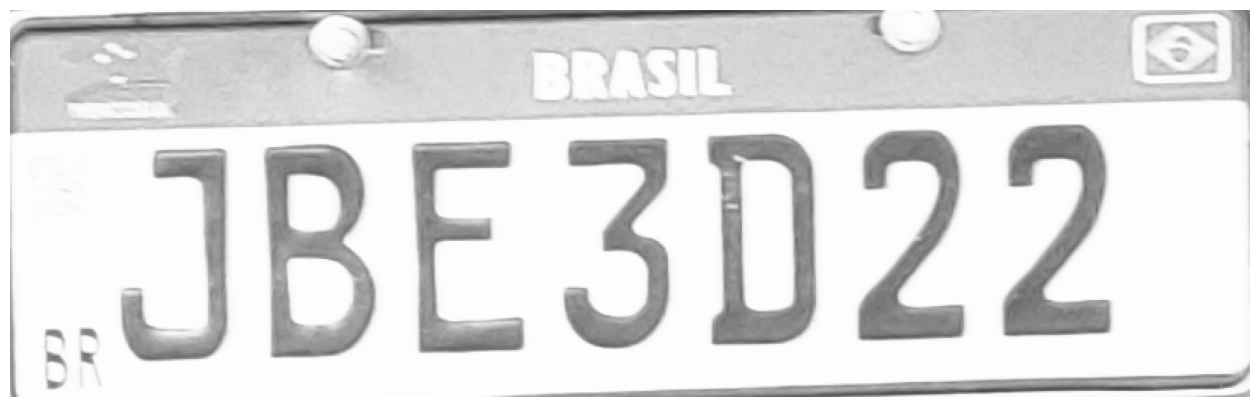

True

In [49]:
(y, x) = np.where(mask==255)
(beginX, beginY) = (np.min(x), np.min(y))
(endX, endY) = (np.max(x), np.max(y))
plate = gray[beginY:endY, beginX:endX]
show_img(plate)

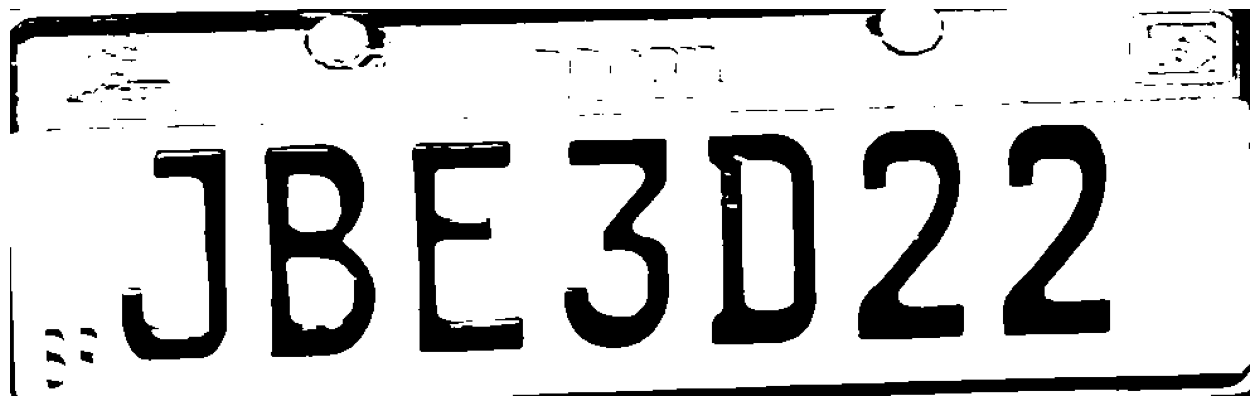

True

In [50]:
increase = cv2.resize(plate, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
value, otsu = cv2.threshold(increase, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
show_img(otsu)

In [36]:
config_tesseract = "--tessdata-dir tessdata --psm 6"
text = pytesseract.image_to_string(plate, lang="por", config=config_tesseract)
text = "".join(character for character in text if character.isalnum())
text

'JBE3D22'